### **Wine Price Prediction**
---------------
- Fast Campus DataScienceSchool 10th
    - *Project of Linear Regression 4th Team*

In [1]:
wine_data = pd.read_csv("winemag-data-130k-v2.csv")
wine_data.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


### Dataset column description
- ##### **price: The cost for a bottle of the wine**
- **country: The country that the wine is from**
- ~~description: The review given by the taster~~
- ~~designation: The vineyard within the winery where the grapes that made the wine are from~~
- **points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)**
- *province: The province or state that the wine is from*
- *region_1: The wine growing area in a province or state (ie Napa)*
- *region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank*
- *taster_name*
- ~~taster_twitter_handle~~
- *title: The title of the wine review, which often contains the vintage if you're interested in extracting that feature*
- **variety: The type of grapes used to make the wine (ie Pinot Noir)**
- ~~winery: The winery that made the wine~~

### Variable
-------

##### x (종속변수) 
        - 실수형 : (standard) points, year, variety_rank, Temperatures/Precipitation per month
        - 범주형 : country, taster_name, variety, winery
##### y (독립변수)
        -  (log) price

#### 목적 : 기존 데이터셋에 메타데이터를 추가하여 모델 생성!

## 1. EDA

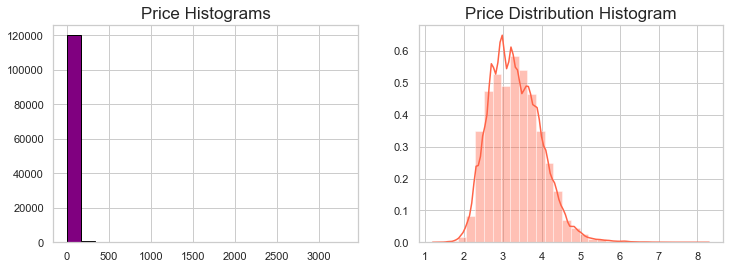

In [2]:
# price histogram
fig,ax = plt.subplots(1,2, figsize=(12,4))
ax1,ax2 = ax.flatten()

wine_data.price.plot.hist(bins=20, color='Purple', edgecolor='black', ax=ax1);
ax1.set_title('Price Histograms', fontsize=17)
ax1.set_ylabel('')
ax1.set_xlabel('')

log_price = np.log(wine_data.price)
sns.distplot(log_price,  bins=30, color='tomato', kde=True, ax=ax2)
ax2.set_title("Price Distribution Histogram", fontsize=17)
ax2.set_ylabel("")
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.2);

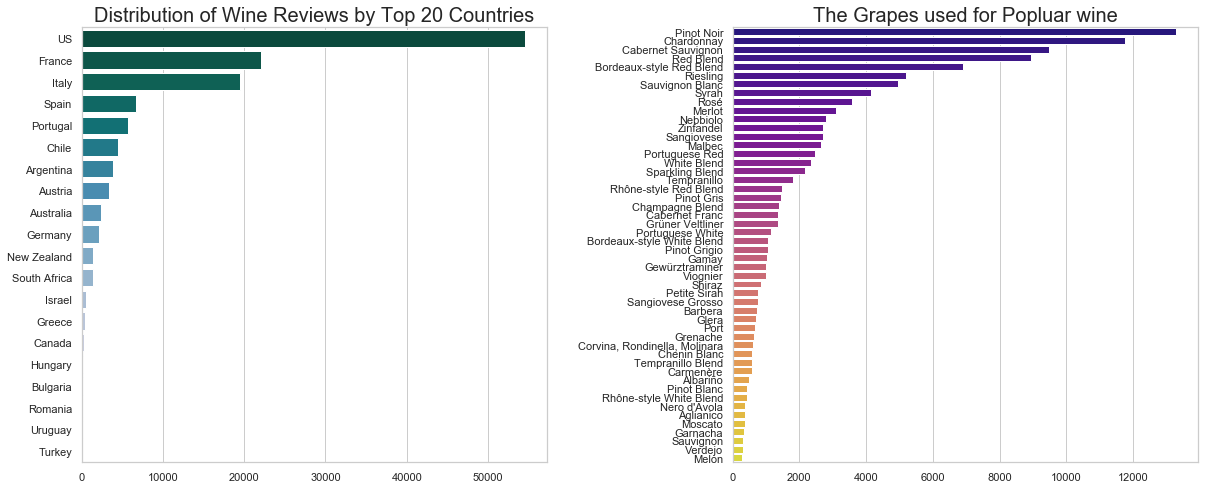

In [3]:
# Top Country / Variety
fig,ax = plt.subplots(1,2, figsize=(20,8))
ax1,ax2 = ax.flatten()

cnt = wine_data['country'].value_counts().to_frame()[:20]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='PuBuGn_r',orient='h', ax=ax1)
ax1.set_title('Distribution of Wine Reviews by Top 20 Countries',  fontsize=20)
ax1.set_ylabel('')
ax1.set_xlabel('')

cnt = wine_data['variety'].value_counts().to_frame()[:50]
sns.barplot(x= cnt['variety'], y =cnt.index, data=cnt, palette='plasma',orient='h', ax=ax2)
ax2.set_title('The Grapes used for Popluar wine', fontsize=20)
ax2.set_ylabel("")
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.4);

**나라별 와인 데이터셋 분리 (US/France/Italy)**

## 2. Linear Regression

### 2.1 국가별 데이터 전처리

In [4]:
# 지역별 와인 분류
wine_US = pd.read_csv("wine_US.csv")
wine_france = pd.read_csv("wine_france.csv")
wine_italy = pd.read_csv("wine_italy.csv")

In [5]:
# 기온/강수량별 데이터 추가
wine_countries = [wine_US, wine_france, wine_italy]

for wine_country in wine_countries :     
    wine_tas = wine_country[['tas_Apr', 'tas_Aug', 'tas_Dec', 'tas_Feb', 'tas_Jan',
       'tas_Jul', 'tas_Jun', 'tas_Mar', 'tas_May', 'tas_Nov', 'tas_Oct',
       'tas_Sep']]
    wine_pr = wine_country[['pr_Apr', 'pr_Aug', 'pr_Dec', 'pr_Feb', 'pr_Jan', 'pr_Jul',
       'pr_Jun', 'pr_Mar', 'pr_May', 'pr_Nov', 'pr_Oct', 'pr_Sep']]

    wine_country["max_tas"] = wine_tas.max(axis=1, skipna= False)
    wine_country["min_tas"] = wine_tas.min(axis=1, skipna= False)
    wine_country["mean_tas"] = wine_tas.mean(axis=1, skipna= False)
    wine_country["var_tas"] = wine_tas.mad(axis=1, skipna= False)
    wine_country["max_pr"] = wine_pr.max(axis=1, skipna= False)
    wine_country["min_pr"] = wine_pr.min(axis=1, skipna= False)
    wine_country["mean_pr"] = wine_pr.mean(axis=1, skipna= False)
    wine_country["var_pr"] = wine_pr.mad(axis=1, skipna= False)

    # 겨울철, 수확기에 따른 기온/강수량 데이터 셋팅
    wine_country["winterRain"] = (wine_country.pr_Jan + wine_country.pr_Feb + wine_country.pr_Dec)/3
    wine_country["winterTemp"] = (wine_country.tas_Jan + wine_country.tas_Feb + wine_country.tas_Dec)/3
    wine_country["seasonTemp"] = (wine_country.tas_May + wine_country.tas_Jun + wine_country.tas_Jul)/3
    wine_country["harvRain"] = (wine_country.pr_Jul + wine_country.pr_Aug)/2
    

### 2.1 wine of US 

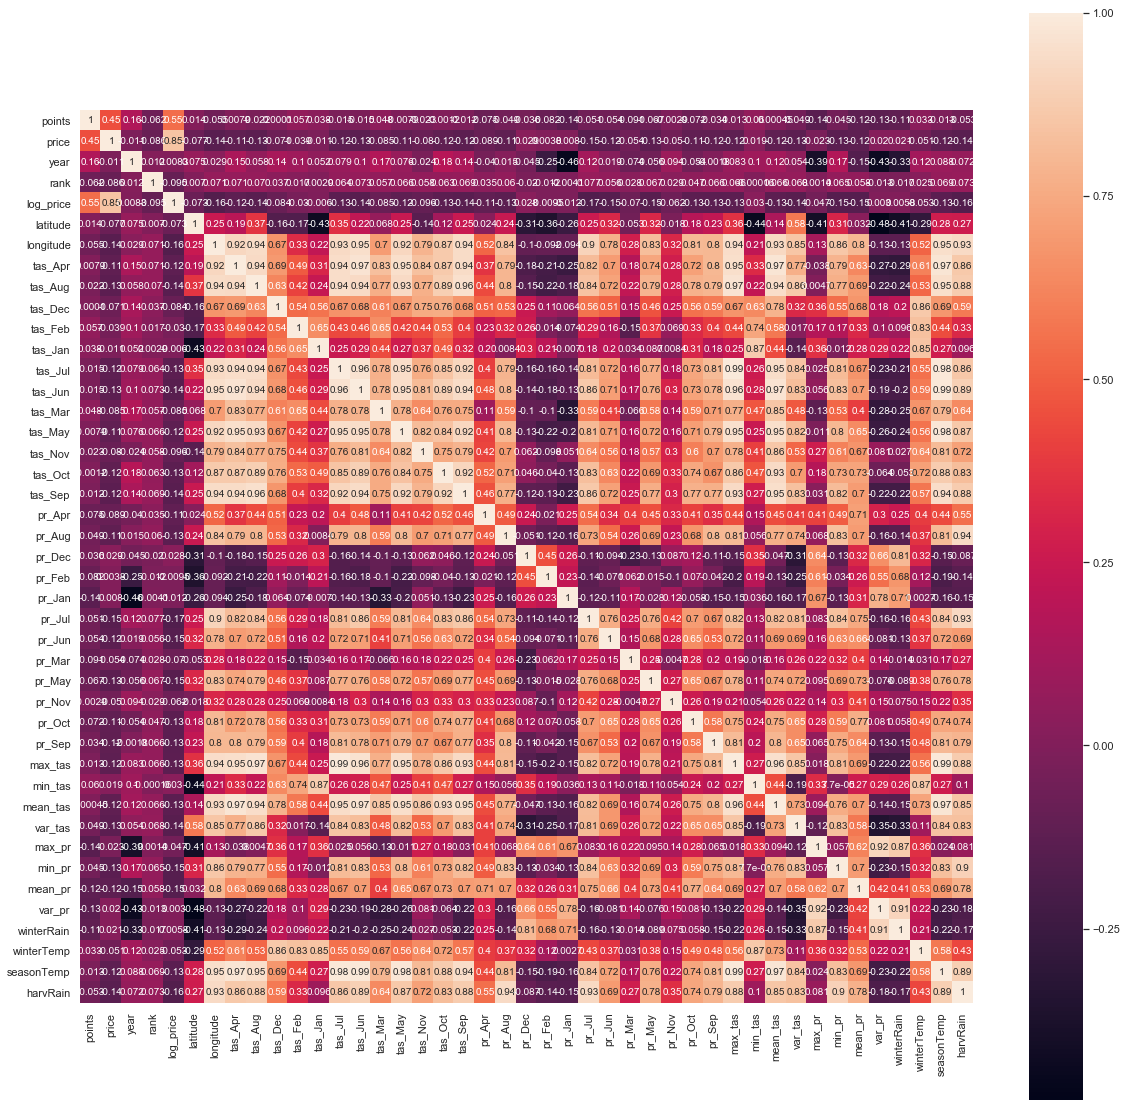

In [6]:
# 상관관계 파악
plt.figure(figsize=(20, 20))
sns.heatmap(wine_US.corr(), annot=True, square=True)
plt.show()

In [7]:
wine_US.isnull().sum()

country            0
points             0
price              0
province           0
region_1         235
taster_name    16394
variety            0
winery             0
year               0
rank               0
log_price          0
cp                 0
latitude           0
longitude          0
tas_Apr            0
tas_Aug            0
tas_Dec            0
tas_Feb            0
tas_Jan            0
tas_Jul            0
tas_Jun            0
tas_Mar            0
tas_May            0
tas_Nov            0
tas_Oct            0
tas_Sep            0
pr_Apr             0
pr_Aug             0
pr_Dec             0
pr_Feb             0
pr_Jan             0
pr_Jul             0
pr_Jun             0
pr_Mar             0
pr_May             0
pr_Nov             0
pr_Oct             0
pr_Sep             0
max_tas            0
min_tas            0
mean_tas           0
var_tas            0
max_pr             0
min_pr             0
mean_pr            0
var_pr             0
winterRain         0
winterTemp   

In [8]:
# taster_name 결측치 채우기
wine_US["taster_name"] = wine_US.taster_name.fillna("etc")

# variety별 순위 ranking
wine_rank = wine_US.groupby("variety").size().rank(ascending=0)
variety_rank = pd.DataFrame(wine_rank, columns=["vrank"])
wine_US = pd.merge(wine_US, variety_rank, on=["variety"], how="outer")

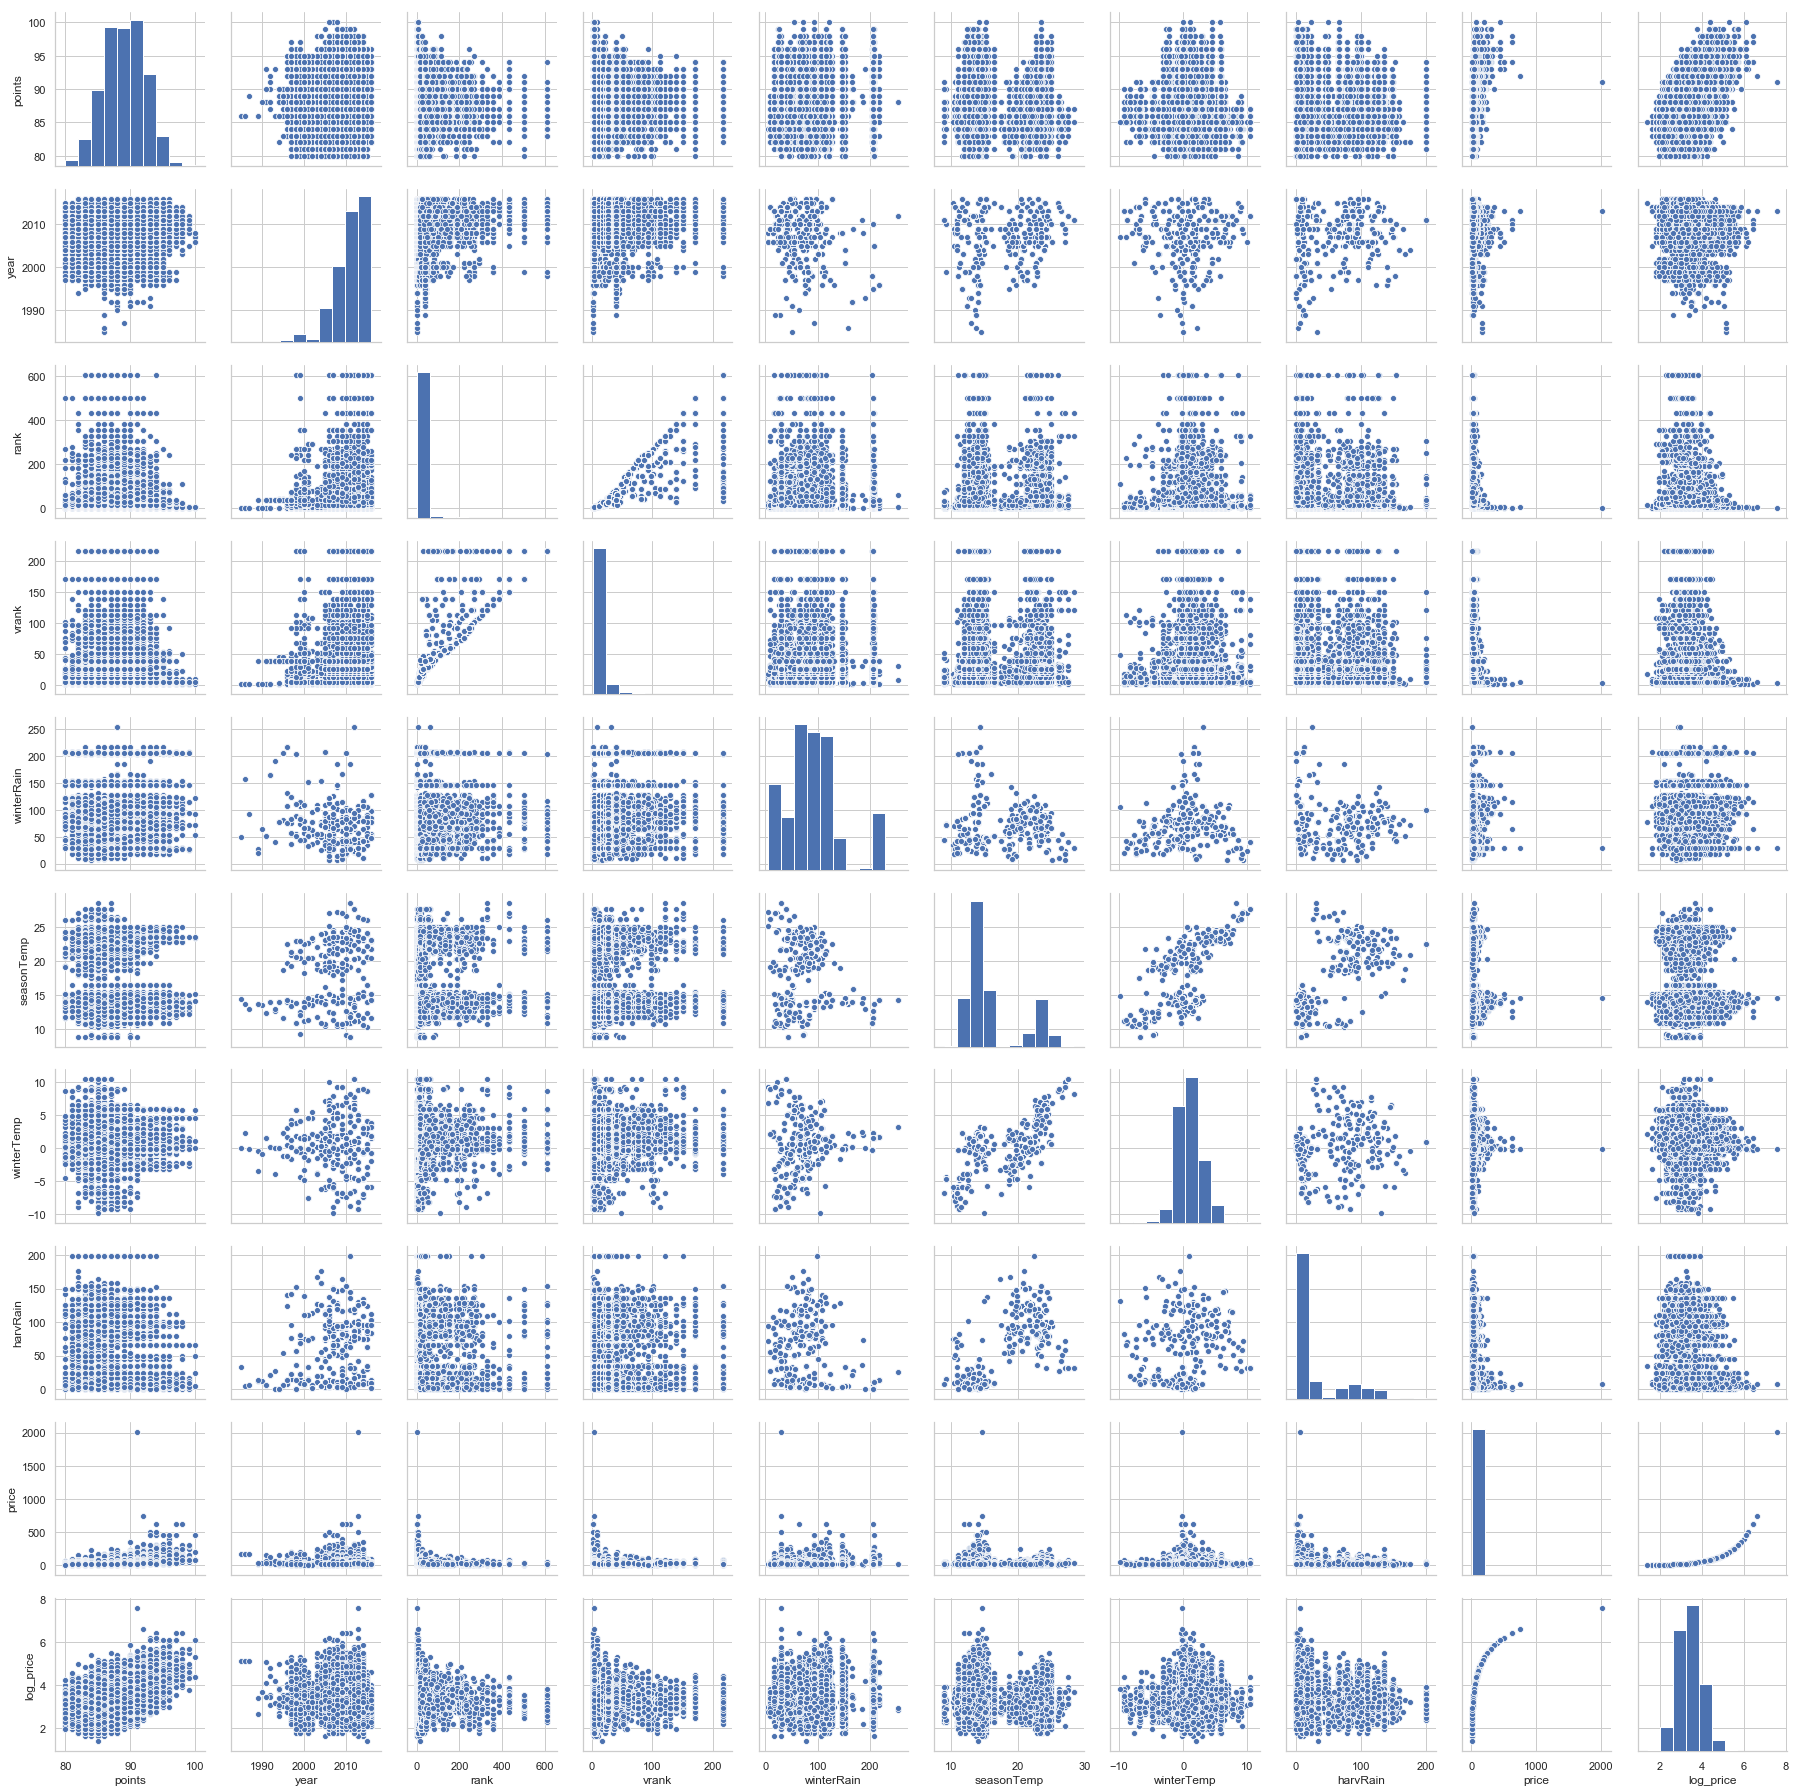

In [9]:
# pairplot 확인
wine_US_1 = wine_US[['points', 'year', 'rank', 'vrank', 'winterRain', 'seasonTemp','winterTemp', 'harvRain','price', 'log_price']]
sns.pairplot(wine_US_1)

In [10]:
wine_US[wine_US['price']>1000]

,country,points,price,province,region_1,taster_name,variety,winery,year,rank,...,var_tas,max_pr,min_pr,mean_pr,var_pr,winterRain,winterTemp,seasonTemp,harvRain,vrank
25916,US,91,2013,California,Arroyo Seco,Matt Kettmann,Chardonnay,Blair,2013,2.0,...,5.618056,55.400002,3.2,18.583333,14.594444,30.0,-0.2,14.6,7.25,3.0


In [11]:
# price 아웃라이어 제거
wine_US = wine_US[wine_US['price']<1000]

# seasonTemp categorizing
wine_US["seasonTemp"] = wine_US["seasonTemp"].apply(lambda x : 0 if x < 18 else 1)

### modeling

In [12]:
# 기존데이터(날씨 제외) OLS (R^2=0.466)
model_us1= sm.OLS.from_formula("log_price ~ scale(vrank) + C(variety) + scale(year) + scale(points)", wine_US)
result_us1= model_us1.fit()
print(result_us1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     187.6
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:10   Log-Likelihood:                -29161.
No. Observations:               53350   AIC:                         5.882e+04
Df Residuals:                   53102   BIC:                         6.102e+04
Df Model:                         247                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [13]:
# 날씨데이터(기존 컬럼 제외) OLS (R^2=0.033)
model_us2 = sm.OLS.from_formula("log_price ~ I(winterTemp **2) + scale(mean_tas) \
+ scale(max_tas) + scale(np.log(harvRain +1 )**2) + seasonTemp", wine_US)
result_us2 = model_us2.fit()
print(result_us2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     362.5
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:11   Log-Likelihood:                -45005.
No. Observations:               53350   AIC:                         9.002e+04
Df Residuals:                   53344   BIC:                         9.007e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [14]:
# model1+model2합친 OLS (최종 모델)(R^2=0.477)
model_us = sm.OLS.from_formula("log_price ~ C(variety) + scale(vrank) + scale(points)\
+scale(winterTemp **3) + scale(mean_tas) + scale(max_tas) + scale(np.log(harvRain +1 )**2)", wine_US)
result_us = model_us.fit()
print(result_us.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:14   Log-Likelihood:                -28618.
No. Observations:               53350   AIC:                         5.774e+04
Df Residuals:                   53099   BIC:                         5.997e+04
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [15]:
print("TSS = ", result_us.uncentered_tss)
print("ESS = ", result_us.mse_model)
print("RSS = ", result_us.ssr)
print("ESS + RSS = ", result_us.mse_model + result_us.ssr)
print("R squared = ", result_us.rsquared)

TSS =  646450.0376216738
ESS =  33.284740964221584
RSS =  9132.510278341482
ESS + RSS =  9165.795019305704
R squared =  0.4767577864417185


In [16]:
formula_us = "log_price ~ C(variety) + scale(vrank) + scale(points)\
+scale(winterTemp **3) + scale(mean_tas) + scale(max_tas) + scale(np.log(harvRain +1 )**2)"

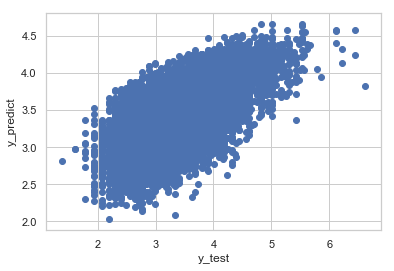

In [17]:
# train_test_split
from sklearn.model_selection import train_test_split

X_us = wine_US[['variety','vrank','points', 'winterTemp', 'mean_tas', 'max_tas', 'harvRain' ]]
y_us = wine_US.log_price
X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.4, random_state=4)

y_predict = result_us.predict(X_test)

plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.scatter(y_test, y_predict)
plt.show()


### 2.2 wine of France

In [18]:
# wine_france.info()

In [19]:
wine_france["taster_name"] = wine_france.taster_name.fillna("etc")

wine_rank = wine_france.groupby("variety").size().rank(ascending=0)
variety_rank = pd.DataFrame(wine_rank, columns=["vrank"])
wine_france = pd.merge(wine_france, variety_rank, on=["variety"], how="outer")

In [20]:
# year 아웃라이어 삭제
wine_france = wine_france[wine_france["year"]>1940]

In [21]:
# 기존데이터(날씨 제외) OLS (R^2=0.503)
model_fr1= sm.OLS.from_formula("log_price ~ C(taster_name) + scale(vrank)  + scale(points)", wine_france)
result_fr1= model_fr1.fit()
print(result_fr1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2074.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:16   Log-Likelihood:                -12545.
No. Observations:               16386   AIC:                         2.511e+04
Df Residuals:                   16377   BIC:                         2.518e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [22]:
# 날씨데이터(기존 컬럼 제외) OLS (R^2=0.127)
model_fr2= sm.OLS.from_formula("log_price ~ scale(harvRain) + scale(np.log(harvRain)) + scale(max_tas)\
+ scale(np.log(max_tas)) + scale(winterTemp) + scale(np.log(min_pr +3)) ", wine_france)
result_fr2= model_fr2.fit()
print(result_fr2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     398.0
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:16   Log-Likelihood:                -17162.
No. Observations:               16386   AIC:                         3.434e+04
Df Residuals:                   16379   BIC:                         3.439e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [23]:
# model1+model2합친 OLS (최종 모델)(R^2=0.539)
model_fr= sm.OLS.from_formula("log_price ~ C(taster_name)+ scale(vrank) + scale(points) + scale(winterRain)\
+ scale(harvRain) + scale(np.log(harvRain))+ scale(max_tas) + scale(np.log(max_tas)) + scale(np.log(min_pr +3)) ", wine_france)
result_fr= model_fr.fit()
print(result_fr.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1366.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:18   Log-Likelihood:                -11938.
No. Observations:               16386   AIC:                         2.391e+04
Df Residuals:                   16371   BIC:                         2.402e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [24]:
print("TSS = ", result_fr.uncentered_tss)
print("ESS = ", result_fr.mse_model)
print("RSS = ", result_fr.ssr)
print("ESS + RSS = ", result_fr.mse_model + result_fr.ssr)
print("R squared = ", result_fr.rsquared)

TSS =  188735.7811277551
ESS =  343.62893623205633
RSS =  4119.017195294129
ESS + RSS =  4462.646131526186
R squared =  0.5387346964204238


In [25]:
formula_fr_origin = "log_price ~ C(taster_name)+ scale(vrank) + scale(points)"
formula_fr_meta = "log_price ~  C(taster_name)+ scale(vrank) + scale(points) + scale(winterRain)\
+ scale(harvRain) + scale(np.log(harvRain))+ scale(max_tas) + scale(np.log(max_tas)) + scale(np.log(min_pr +3))"

In [26]:
# train_test_split
from sklearn.model_selection import train_test_split

df_train_fr, df_test_fr = train_test_split(wine_france, test_size=0.4, random_state=4)
df_train_fr.shape, df_test_fr.shape

((9831, 51), (6555, 51))

In [27]:
df_train_fr = sm.add_constant(df_train_fr)
df_test_fr = sm.add_constant(df_test_fr)

temp_train_fr = df_train_fr.copy()
temp_test_fr = df_test_fr.copy()

temp_train_fr = temp_train_fr[["log_price","taster_name", "vrank", "points","winterRain", "harvRain", "max_tas", "min_pr"]]


from sklearn.model_selection import KFold
from patsy import *

split_number = 5
cv = KFold(split_number, shuffle=True, random_state=3)
train_R2 = []
test_R2 = []

for i, (idx_train, idx_test) in enumerate(cv.split(temp_train_fr)):
    df_train_fr = temp_train_fr.iloc[idx_train]
    df_test_fr = temp_train_fr.iloc[idx_test]

    model = sm.OLS.from_formula(formula_fr_origin, data=df_train_fr)
    result = model.fit()
        
    pred = result.predict(df_test_fr)
    rss = ((df_test_fr.log_price - pred) ** 2).sum()
    ess = ((pred - pred.mean()) ** 2).sum()
    tss = ((df_test_fr.log_price - df_test_fr.log_price.mean())** 2).sum()
    rsquared = ess / tss
    train_R2.append(result.rsquared)
    test_R2.append(rsquared)

    
dic = {
    "R_squared" : train_R2 + test_R2,
    "split" : ["train"]*5 + ["test"]*5,
    "data_type" : "origin",
    "country" : "france",
}

df_france_origin = pd.DataFrame(dic)


R2_france_origin = pd.DataFrame([train_R2, test_R2], index = ["Fr_org_train_R2", "Fr_org_test_R2"])
R2_france_origin

,0,1,2,3,4
Fr_org_train_R2,0.504617,0.506421,0.508858,0.503272,0.505178
Fr_org_test_R2,0.484186,0.494047,0.543341,0.500924,0.508596


In [28]:
df_train_fr = sm.add_constant(df_train_fr)
df_test_fr = sm.add_constant(df_test_fr)

temp_train_fr = df_train_fr.copy()
temp_test_fr = df_test_fr.copy()

temp_train_fr = temp_train_fr[["log_price","taster_name", "vrank", "points","winterRain", "harvRain", "max_tas", "min_pr"]]


from sklearn.model_selection import KFold
from patsy import *

split_number = 5
cv = KFold(split_number, shuffle=True, random_state=3)
train_R2 = []
test_R2 = []

for i, (idx_train, idx_test) in enumerate(cv.split(temp_train_fr)):
    df_train_fr = temp_train_fr.iloc[idx_train]
    df_test_fr = temp_train_fr.iloc[idx_test]

    model = sm.OLS.from_formula(formula_fr_meta, data=df_train_fr)
    result = model.fit()
        
    pred = result.predict(df_test_fr)
    rss = ((df_test_fr.log_price - pred) ** 2).sum()
    ess = ((pred - pred.mean()) ** 2).sum()
    tss = ((df_test_fr.log_price - df_test_fr.log_price.mean())** 2).sum()
    rsquared = ess / tss
    train_R2.append(result.rsquared)
    test_R2.append(rsquared)
    

dic = {
    "R_squared" : train_R2 + test_R2,
    "split" : ["train"]*5 + ["test"]*5,
    "data_type" : "meta",
    "country" : "france",
}

df_france_meta = pd.DataFrame(dic)

    
    
R2_france_meta = pd.DataFrame([train_R2, test_R2], index = ["Fr_mt_train_R2", "Fr_mt_test_R2"])
R2_france_meta

,0,1,2,3,4
Fr_mt_train_R2,0.542224,0.551824,0.539246,0.539891,0.540130
Fr_mt_test_R2,0.567948,0.521177,0.547805,0.550511,0.527745


### 2.3 wine of Italy

In [29]:
# wine_italy.info()

In [30]:
wine_italy["taster_name"] = wine_italy.taster_name.fillna("etc")

wine_rank = wine_italy.groupby("variety").size().rank(ascending=0)
variety_rank = pd.DataFrame(wine_rank, columns=["vrank"])
wine_italy = pd.merge(wine_italy, variety_rank, on=["variety"], how="outer")

In [31]:
# year 아웃라이어 제거
wine_italy = wine_italy[wine_italy["year"]>1950]

# seasonTemp 카테고리화
wine_italy["seasonTemp"] = wine_italy["seasonTemp"].apply(lambda x : 0 if x<15 else 1)

In [32]:
# 기존데이터(날씨 제외) OLS (R^2=0.511)
model_it1= sm.OLS.from_formula("log_price ~  C(taster_name) + scale(vrank) + scale(np.log(year)) + scale(points)\
", wine_italy)
result_it1= model_it1.fit()
print(result_it1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     2098.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:22   Log-Likelihood:                -10705.
No. Observations:               16063   AIC:                         2.143e+04
Df Residuals:                   16054   BIC:                         2.150e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [33]:
# 날씨데이터(기존 컬럼 제외) OLS (R^2=0.059)
model_it2 = sm.OLS.from_formula("log_price ~ scale(winterRain) + scale(np.log(harvRain)) \
+ scale(max_tas) + scale(min_tas)+ seasonTemp", wine_italy)
result_it2 = model_it2.fit()
print(result_it2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 10 Jul 2019   Prob (F-statistic):          8.89e-209
Time:                        13:43:22   Log-Likelihood:                -15964.
No. Observations:               16063   AIC:                         3.194e+04
Df Residuals:                   16057   BIC:                         3.199e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [34]:
# model1+model2합친 OLS (최종 모델)(R^2=0.520)
model_it= sm.OLS.from_formula("log_price ~ C(taster_name) + scale(vrank) + scale(np.log(year)) + scale(points)\
+ scale(np.log(winterRain)**2) + scale(np.log(harvRain)) + scale(max_tas) + scale(min_tas) + seasonTemp", wine_italy)
result_it= model_it.fit()
print(result_it.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1335.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:23   Log-Likelihood:                -10564.
No. Observations:               16063   AIC:                         2.116e+04
Df Residuals:                   16049   BIC:                         2.126e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [35]:
print("TSS = ", result_it.uncentered_tss)
print("ESS = ", result_it.mse_model)
print("RSS = ", result_it.ssr)
print("ESS + RSS = ", result_it.mse_model + result.ssr)
print("R squared = ", result_it.rsquared)

TSS =  198569.89232196446
ESS =  291.5631461207627
RSS =  3504.0453422106275
ESS + RSS =  1907.8808973294667
R squared =  0.5196230589382504


In [36]:
formula_it_origin = "log_price ~ C(taster_name) + scale(vrank) + scale(np.log(year)) + scale(points)"
formula_it_meta = "log_price ~ C(taster_name) + scale(vrank) + scale(np.log(year)) + scale(points)\
+ scale(np.log(winterRain)**2) + scale(np.log(harvRain)) + scale(max_tas) + scale(min_tas) + seasonTemp"

In [37]:
# train_test_split
from sklearn.model_selection import train_test_split

df_train_it, df_test_it = train_test_split(wine_italy, test_size=0.4, random_state=5)
df_train_it.shape, df_test_it.shape

((9637, 51), (6426, 51))

In [38]:
df_train_it = sm.add_constant(df_train_it)
df_test_it = sm.add_constant(df_test_it)

temp_train_it = df_train_it.copy()
temp_test_it = df_test_it.copy()

temp_train_it = temp_train_it[["log_price", "taster_name", "vrank", "year", "points", "max_tas","min_tas", "winterRain", "harvRain", "seasonTemp"]]

from sklearn.model_selection import KFold
from patsy import *

split_number = 5
cv = KFold(split_number, shuffle=True, random_state=3)
train_R2 = []
test_R2 = []

for i, (idx_train, idx_test) in enumerate(cv.split(temp_train_it)):
    df_train_it = temp_train_it.iloc[idx_train]
    df_test_it = temp_train_it.iloc[idx_test]

    model = sm.OLS.from_formula(formula_it_origin, data=df_train_it)
    result = model.fit()
        
    pred = result.predict(df_test_it)
    rss = ((df_test_it.log_price - pred) ** 2).sum()
    ess = ((pred - pred.mean()) ** 2).sum()
    tss = ((df_test_it.log_price - df_test_it.log_price.mean())** 2).sum()
    rsquared = ess / tss
    train_R2.append(result.rsquared)
    test_R2.append(rsquared)


dic = {
    "R_squared" : train_R2 + test_R2,
    "split" : ["train"]*5 + ["test"]*5,
    "data_type" : "origin",
    "country" : "italy",
}

df_it_origin = pd.DataFrame(dic)
    
R2_italy_origin = pd.DataFrame([train_R2, test_R2], index = ["It_org_train_R2", "It_org_test_R2"])
R2_italy_origin

,0,1,2,3,4
It_org_train_R2,0.503744,0.510400,0.509266,0.511028,0.514620
It_org_test_R2,0.522801,0.505992,0.499084,0.511887,0.509411


In [39]:
df_train_it = sm.add_constant(df_train_it)
df_test_it = sm.add_constant(df_test_it)

temp_train_it = df_train_it.copy()
temp_test_it = df_test_it.copy()

temp_train_it = temp_train_it[["log_price", "taster_name", "vrank", "year", "points", "max_tas","min_tas", "winterRain", "harvRain", "seasonTemp"]]

from sklearn.model_selection import KFold
from patsy import *

split_number = 5
cv = KFold(split_number, shuffle=True, random_state=3)
train_R2 = []
test_R2 = []

for i, (idx_train, idx_test) in enumerate(cv.split(temp_train_it)):
    df_train_it = temp_train_it.iloc[idx_train]
    df_test_it = temp_train_it.iloc[idx_test]

    model = sm.OLS.from_formula(formula_it_meta, data=df_train_it)
    result = model.fit()
        
    pred = result.predict(df_test_it)
    rss = ((df_test_it.log_price - pred) ** 2).sum()
    ess = ((pred - pred.mean()) ** 2).sum()
    tss = ((df_test_it.log_price - df_test_it.log_price.mean())** 2).sum()
    rsquared = ess / tss
    train_R2.append(result.rsquared)
    test_R2.append(rsquared)
    
dic = {
    "R_squared" : train_R2 + test_R2,
    "split" : ["train"]*5 + ["test"]*5,
    "data_type" : "meta",
    "country" : "italy",
}

df_it_meta = pd.DataFrame(dic)

R2_italy_meta = pd.DataFrame([train_R2, test_R2], index = ["It_mt_train_R2", "It_mt_test_R2"])
R2_italy_meta


,0,1,2,3,4
It_mt_train_R2,0.521118,0.524526,0.520299,0.528398,0.520932
It_mt_test_R2,0.512922,0.526610,0.538106,0.545980,0.495904


In [40]:
df_fr = pd.concat([df_france_origin, df_france_meta])
df_it = pd.concat([df_it_origin, df_it_meta])
df_fr_it = pd.concat([df_france_origin, df_france_meta, df_it_origin, df_it_meta])

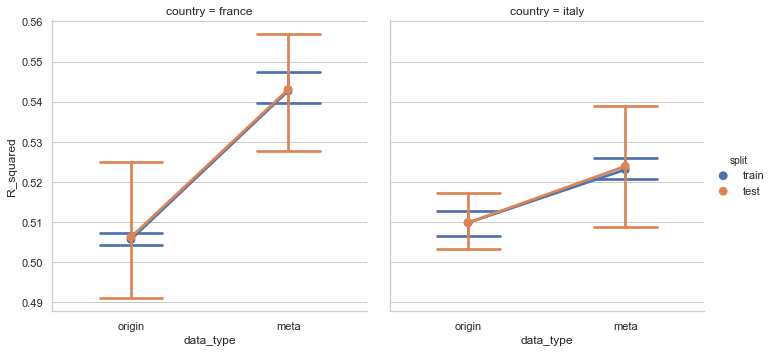

In [41]:
sns.catplot(x="data_type", y="R_squared", hue="split", col="country", col_wrap=2, kind="point", capsize=.4, data = df_fr_it)
plt.show()
